In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression

In [3]:
nih_df = pd.read_csv('NIH_DravetSyndrome_2014_2024.csv')
nih_df.head()

NIH Spending Categorization  \
0                          No NIH Category available   
1                          No NIH Category available   
2                          No NIH Category available   
3  Brain Disorders; Epilepsy; Neurodegenerative; ...   
4                          No NIH Category available   

                                       Project Terms  \
0  Acute;Administrative Supplement;Animal Model;A...   
1  Acute;Animal Model;Animals;Apnea;Arousal;Biolo...   
2  Action Potentials;Affect;Age;Age Months;Axon;C...   
3  Acute;Administrative Supplement;Animal Model;A...   
4  5&apos;-AMP-activated protein kinase;Age;Anima...   

                                       Project Title  \
0  Administrative Supplement to Investigate Subpo...   
1  Serotonergic circuit mechanisms in postictal r...   
2  Aberrant Parvalbumin-Positive Interneuron Acti...   
3  Administrative Supplement to Serotonergic circ...   
4  Pharmacological and Chemical Approaches to Rep...   

                             Public Health Relevance Administering IC  \
0  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
1  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
2  PROJECT NARRATIVESCN8A encephalopathy is a sev...            NINDS   
3  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
4  RELEVANCE TO PUBLIC HEALTHAggressive and invas...            NIGMS   

   Application ID Award Notice Date Opportunity Number     Project Number  \
0        11035485    5/10/2024 0:00          PA-23-189  3R01NS129722-02S2   
1        10983056   11/22/2023 0:00          PA-20-185  3R01NS129722-02S1   
2        10901303    3/26/2024 0:00          PA-21-052  1F31NS134264-01A1   
3        10841319    8/22/2023 0:00          PA-21-071  3R01NS129722-01S1   
4        10837849     5/9/2024 0:00         PAR-21-169    5R16GM145557-03   

  Type  ...     Funding Mechanism Fiscal Year Total Cost  \
0    3  ...         Non-SBIR/STTR        2024      43783   
1    3  ...         Non-SBIR/STTR        2024      65564   
2    1  ...  Training, Individual        2024      38001   
3    3  ...         Non-SBIR/STTR        2023      27837   
4    5  ...         Non-SBIR/STTR        2024     164000   

  Total Cost (Sub Projects) Funding IC(s) Direct Cost IC InDirect Cost IC  \
0                                   NINDS          30591            13192   
1                                   NINDS          45241            20323   
2                                   NINDS          38001                0   
3                                   NINDS          19184             8653   
4                                   NIGMS         100000            64000   

  NIH COVID-19 Response                                   Project Abstract  \
0                        ABSTRACTSudden unexpected death in epilepsy (S...   
1                        ABSTRACTSudden unexpected death in epilepsy (S...   
2                        PROJECT SUMMARYSCN8A epileptic encephalopathy ...   
3                        ABSTRACTSudden unexpected death in epilepsy (S...   
4                        PROJECT SUMMARY / ABSTRACTGlioblastoma multifo...   

  Total Cost IC  
0         43783  
1         65564  
2         38001  
3         27837  
4        164000  

[5 rows x 53 columns]

In [4]:
nih_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   NIH Spending Categorization    289 non-null    object
 1   Project Terms                  289 non-null    object
 2   Project Title                  289 non-null    object
 3   Public Health Relevance        284 non-null    object
 4   Administering IC               289 non-null    object
 5   Application ID                 289 non-null    int64 
 6   Award Notice Date              289 non-null    object
 7   Opportunity Number             289 non-null    object
 8   Project Number                 289 non-null    object
 9   Type                           289 non-null    object
 10  Activity                       289 non-null    object
 11  IC                             289 non-null    object
 12  Serial Number                  289 non-null    object
 13  Suppo

In [5]:
# Convert dates
date_columns = ['Award Notice Date', 'Project Start Date', 'Project End Date', 'Budget Start Date', 'Budget End Date']
for col in date_columns:
    nih_df[col] = pd.to_datetime(nih_df[col], errors='coerce')

# Convert numerical columns to float
numerical_columns = ['Application ID', 'Serial Number', 'Support Year', 'Congressional District', 'Latitude', 'Longitude', 'Organization ID (IPF)',
                     'Organization Zip', 'CFDA Code', 'Fiscal Year', 'Total Cost', 'Direct Cost IC', 'InDirect Cost IC', 'Total Cost IC']
for col in numerical_columns:
    nih_df[col] = pd.to_numeric(nih_df[col], errors='coerce')

# Convert categorical data
category_columns = ['Administering IC', 'IC', 'Department', 'Funding Mechanism', 'Funding IC(s)']
for col in category_columns:
    nih_df[col] = nih_df[col].astype('category')

# Display the data types to confirm the conversions
nih_df.dtypes

NIH Spending Categorization              object
Project Terms                            object
Project Title                            object
Public Health Relevance                  object
Administering IC                       category
Application ID                            int64
Award Notice Date                datetime64[ns]
Opportunity Number                       object
Project Number                           object
Type                                     object
Activity                                 object
IC                                     category
Serial Number                           float64
Support Year                            float64
Suffix                                   object
Program Official Information             object
Project Start Date               datetime64[ns]
Project End Date                 datetime64[ns]
Study Section                            object
Subproject Number                        object
Contact PI Person ID                    

In [6]:
nih_df.head()

NIH Spending Categorization  \
0                          No NIH Category available   
1                          No NIH Category available   
2                          No NIH Category available   
3  Brain Disorders; Epilepsy; Neurodegenerative; ...   
4                          No NIH Category available   

                                       Project Terms  \
0  Acute;Administrative Supplement;Animal Model;A...   
1  Acute;Animal Model;Animals;Apnea;Arousal;Biolo...   
2  Action Potentials;Affect;Age;Age Months;Axon;C...   
3  Acute;Administrative Supplement;Animal Model;A...   
4  5&apos;-AMP-activated protein kinase;Age;Anima...   

                                       Project Title  \
0  Administrative Supplement to Investigate Subpo...   
1  Serotonergic circuit mechanisms in postictal r...   
2  Aberrant Parvalbumin-Positive Interneuron Acti...   
3  Administrative Supplement to Serotonergic circ...   
4  Pharmacological and Chemical Approaches to Rep...   

                             Public Health Relevance Administering IC  \
0  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
1  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
2  PROJECT NARRATIVESCN8A encephalopathy is a sev...            NINDS   
3  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
4  RELEVANCE TO PUBLIC HEALTHAggressive and invas...            NIGMS   

   Application ID Award Notice Date Opportunity Number     Project Number  \
0        11035485        2024-05-10          PA-23-189  3R01NS129722-02S2   
1        10983056        2023-11-22          PA-20-185  3R01NS129722-02S1   
2        10901303        2024-03-26          PA-21-052  1F31NS134264-01A1   
3        10841319        2023-08-22          PA-21-071  3R01NS129722-01S1   
4        10837849        2024-05-09         PAR-21-169    5R16GM145557-03   

  Type  ...     Funding Mechanism Fiscal Year  Total Cost  \
0    3  ...         Non-SBIR/STTR        2024       43783   
1    3  ...         Non-SBIR/STTR        2024       65564   
2    1  ...  Training, Individual        2024       38001   
3    3  ...         Non-SBIR/STTR        2023       27837   
4    5  ...         Non-SBIR/STTR        2024      164000   

   Total Cost (Sub Projects) Funding IC(s) Direct Cost IC InDirect Cost IC  \
0                                    NINDS        30591.0          13192.0   
1                                    NINDS        45241.0          20323.0   
2                                    NINDS        38001.0              0.0   
3                                    NINDS        19184.0           8653.0   
4                                    NIGMS       100000.0          64000.0   

  NIH COVID-19 Response                                   Project Abstract  \
0                        ABSTRACTSudden unexpected death in epilepsy (S...   
1                        ABSTRACTSudden unexpected death in epilepsy (S...   
2                        PROJECT SUMMARYSCN8A epileptic encephalopathy ...   
3                        ABSTRACTSudden unexpected death in epilepsy (S...   
4                        PROJECT SUMMARY / ABSTRACTGlioblastoma multifo...   

  Total Cost IC  
0         43783  
1         65564  
2         38001  
3         27837  
4        164000  

[5 rows x 53 columns]

In [7]:
# Convert 'Fiscal Year' to integer, handling NaN values by converting them to a placeholder year, then converting to integer
nih_df['Fiscal Year'] = pd.to_numeric(nih_df['Fiscal Year'], errors='coerce').fillna(0).astype(int)


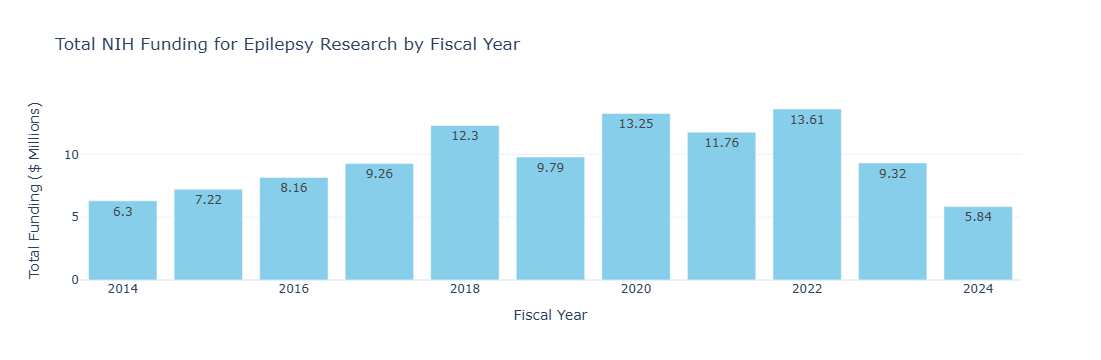

In [8]:
# Filtering out entries where Fiscal Year is 0
filtered_data = nih_df[nih_df['Fiscal Year'] != 0]
filtered_data = filtered_data[filtered_data['Type'] != '139104']

# 1.1 Funding Trends Over Time
# Summing the 'Total Cost' for each 'Fiscal Year'
funding_trends = filtered_data.groupby('Fiscal Year')['Total Cost'].sum().reset_index()

# Convert total cost to millions of dollars
funding_trends['Total Cost'] = funding_trends['Total Cost'] / 1e6

# Creating a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        name='Total Funding',
        x=funding_trends['Fiscal Year'],
        y=funding_trends['Total Cost'],
        marker_color='skyblue',
        text=funding_trends['Total Cost'].round(2),  # Round to 2 decimal places for hover text
        hovertemplate='%{x}<br>Total Funding: $%{text}M'  # Custom hover template
    )
])

# Updating layout for better visualization
fig.update_layout(
    title='Total NIH Funding for Epilepsy Research by Fiscal Year',
    xaxis_title='Fiscal Year',
    yaxis_title='Total Funding ($ Millions)',
    xaxis_tickangle=0,
    height=600,  # Increase the height of the graph
    template='plotly_white'
)

# Displaying the plot
fig.show()

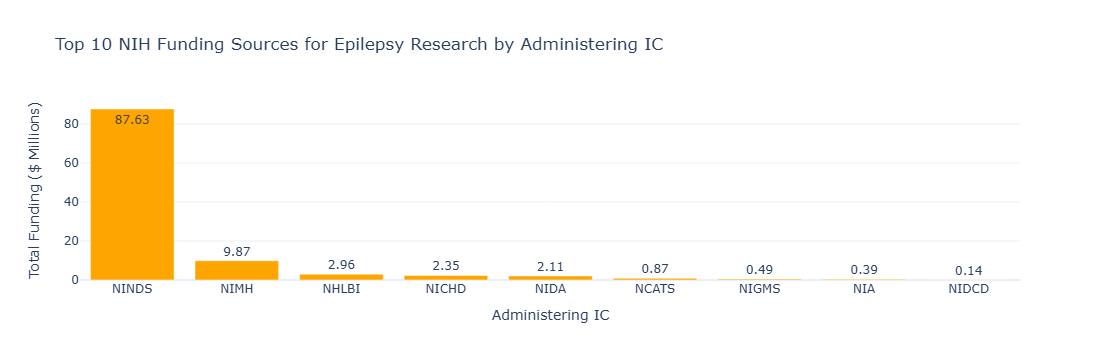

In [9]:
# Filtering out entries where Fiscal Year is 0
filtered_data = nih_df[nih_df['Fiscal Year'] != 0]
filtered_data = filtered_data[filtered_data['Type'] != '139104']

# 1.2 Funding Distribution by Administering IC
# Summing the 'Total Cost' for each 'Administering IC' and selecting the top 10
funding_by_ic = filtered_data.groupby('Administering IC', observed=True)['Total Cost'].sum().sort_values(ascending=False).head(10).reset_index()

# Convert total cost to millions of dollars
funding_by_ic['Total Cost'] = funding_by_ic['Total Cost'] / 1e6

# Creating a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        name='Total Funding',
        x=funding_by_ic['Administering IC'],
        y=funding_by_ic['Total Cost'],
        marker_color='Orange',
        text=funding_by_ic['Total Cost'].round(2),  # Round to 2 decimal places for hover text
        hovertemplate='%{x}<br>Total Funding: $%{text}M'  # Custom hover template
    )
])

# Updating layout for better visualization
fig.update_layout(
    title='Top 10 NIH Funding Sources for Epilepsy Research by Administering IC',
    xaxis_title='Administering IC',
    yaxis_title='Total Funding ($ Millions)',
    xaxis_tickangle=0,
    height=600,  # Increase the height of the graph
    template='plotly_white'
)

# Displaying the plot
fig.show()

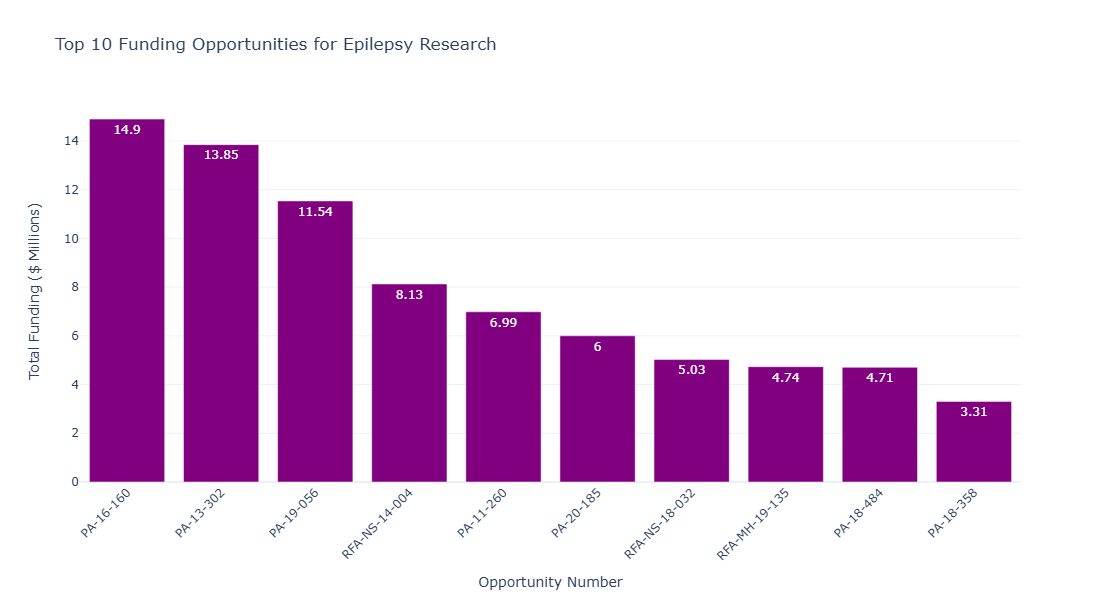

In [10]:
# Filtering out entries where Fiscal Year is 0
filtered_data = nih_df[nih_df['Fiscal Year'] != 0]
filtered_data = filtered_data[filtered_data['Type'] != '139104']

# Replace blank values in 'Opportunity Number' with 'Unknown'
filtered_data['Opportunity Number'] = filtered_data['Opportunity Number'].replace(' ', 'Unknown')

# Visualization 1: Funding by Opportunity Number (Top 10)
top_opportunities = filtered_data.groupby('Opportunity Number', observed=True)['Total Cost'].sum().sort_values(ascending=False).head(10).reset_index()

# Convert total cost to millions of dollars
top_opportunities['Total Cost'] = top_opportunities['Total Cost'] / 1e6

# Creating a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        name='Total Funding',
        x=top_opportunities['Opportunity Number'],
        y=top_opportunities['Total Cost'],
        marker_color='purple',
        text=top_opportunities['Total Cost'].round(2),  # Round to 2 decimal places for hover text
        hovertemplate='%{x}<br>Total Funding: $%{text}M'  # Custom hover template
    )
])

# Updating layout for better visualization
fig.update_layout(
    title='Top 10 Funding Opportunities for Epilepsy Research',
    xaxis_title='Opportunity Number',
    yaxis_title='Total Funding ($ Millions)',
    xaxis_tickangle=-45,
    height=600,  # Increase the height of the graph
    template='plotly_white'
)

# Displaying the plot
fig.show()

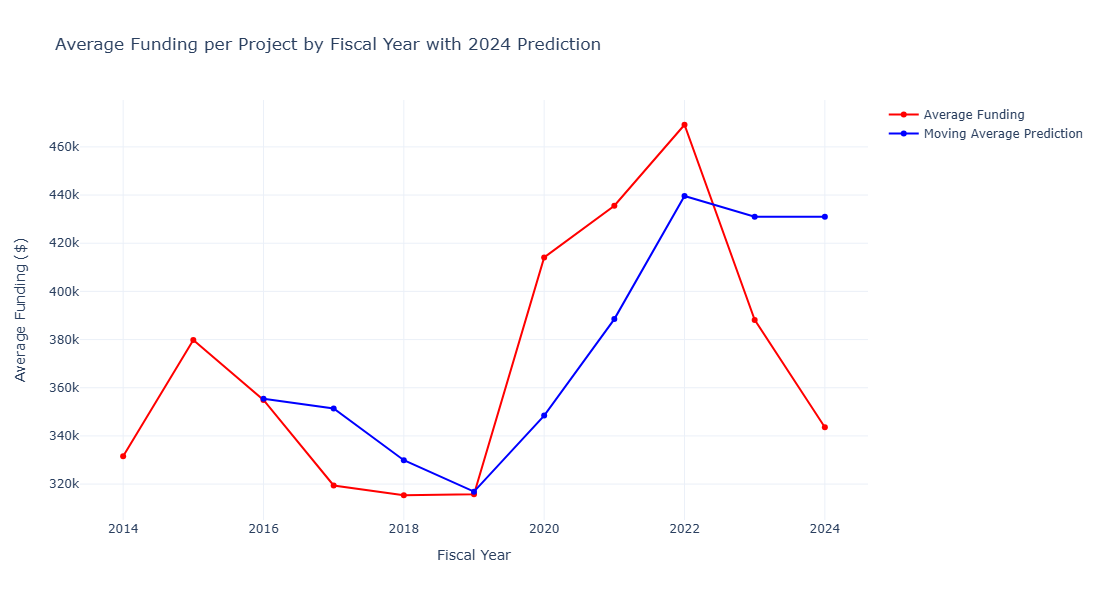

In [11]:
# Filtering out entries where Fiscal Year is 0
filtered_data = nih_df[nih_df['Fiscal Year'] != 0]
filtered_data = filtered_data[filtered_data['Type'] != '139104']

# Calculate the average funding per project by year
average_funding_per_project = filtered_data.groupby('Fiscal Year')['Total Cost'].mean().reset_index()

# Filter data for the years 2014 to 2023
average_funding_per_project = average_funding_per_project[(average_funding_per_project['Fiscal Year'] >= 2014) & (average_funding_per_project['Fiscal Year'] <= 2023)]

# Calculate the moving average for prediction
average_funding_per_project['Moving_Average'] = average_funding_per_project['Total Cost'].rolling(window=3).mean()

# Predict the funding for 2024 using the moving average
predicted_2024 = average_funding_per_project['Moving_Average'].iloc[-1]

# Actual funding raised so far in 2024
actual_2024 = filtered_data[filtered_data['Fiscal Year'] == 2024]['Total Cost'].mean()

# Create a DataFrame for 2024 predictions and actuals
data_2024 = pd.DataFrame({'Fiscal Year': [2024], 'Total Cost': [actual_2024], 'Moving_Average': [predicted_2024]})

# Append the prediction and actual funding for 2024 to the DataFrame using pd.concat
average_funding_per_project = pd.concat([average_funding_per_project, data_2024], ignore_index=True)

# Create a line chart using Plotly
fig = go.Figure()

# Add the average funding per project line
fig.add_trace(go.Scatter(
    x=average_funding_per_project['Fiscal Year'],
    y=average_funding_per_project['Total Cost'],
    mode='lines+markers',
    name='Average Funding',
    marker=dict(color='red'),
    hovertemplate='Year: %{x}<br>Average Funding: $%{y:,.2f}'
))

# Add the moving average prediction line
fig.add_trace(go.Scatter(
    x=average_funding_per_project['Fiscal Year'],
    y=average_funding_per_project['Moving_Average'],
    mode='lines+markers',
    name='Moving Average Prediction',
    marker=dict(color='blue'),
    hovertemplate='Year: %{x}<br>Moving Average: $%{y:,.2f}'
))

# Updating layout for better visualization
fig.update_layout(
    title='Average Funding per Project by Fiscal Year with 2024 Prediction',
    xaxis_title='Fiscal Year',
    yaxis_title='Average Funding ($)',
    xaxis_tickangle=0,
    height=600,  # Increase the height of the graph
    template='plotly_white'
)

# Displaying the plot
fig.show()

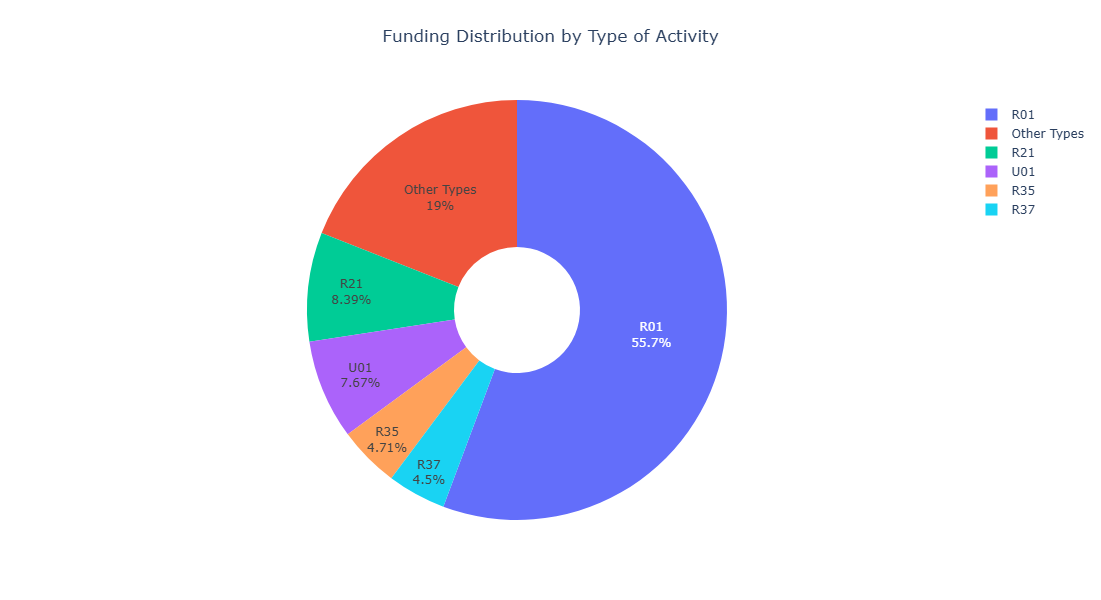

In [12]:
# Filtering out entries where Fiscal Year is 0
filtered_data = nih_df[nih_df['Fiscal Year'] != 0]
filtered_data = filtered_data[filtered_data['Type'] != '139104']

# Summing the 'Total Cost' for each 'Activity'
activity_funding = filtered_data.groupby('Activity')['Total Cost'].sum().sort_values(ascending=False)

# Focusing on top 5 types and combining the rest as 'Other Types'
top_5_activities = activity_funding.head(5)
other_activities = activity_funding.iloc[5:].sum()
top_5_activities['Other Types'] = other_activities

# Converting to DataFrame for Plotly
top_5_activities = top_5_activities.reset_index()

# Converting Total Cost to millions for easier reading
top_5_activities['Total Cost'] = top_5_activities['Total Cost'] / 1e6

# Creating a pie chart using Plotly
fig = px.pie(
    top_5_activities, 
    names='Activity', 
    values='Total Cost', 
    title='Funding Distribution by Type of Activity',
    hole=0.3  # This creates a donut chart, adjust or remove as needed
)

# Formatting the hover data to display in millions
fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}: $%{value:,.2f}M'
)

# Updating layout for better visualization, including centering the title
fig.update_layout(
    template='plotly_white',
    height=600,  # Increase the height of the graph
    title={
        'text': 'Funding Distribution by Type of Activity',
        'y': 0.95,  # Positioning the title closer to the top
        'x': 0.5,  # Centering the title
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Displaying the plot
fig.show()

In [13]:
pd.options.display.float_format = '{:.2f}'.format
# Calculating basic descriptive statistics
descriptive_stats = filtered_data[['Total Cost', 'Direct Cost IC', 'InDirect Cost IC']].describe()

# Calculating additional statistics
variance = filtered_data[['Total Cost', 'Direct Cost IC', 'InDirect Cost IC']].var()
skewness = filtered_data[['Total Cost', 'Direct Cost IC', 'InDirect Cost IC']].skew()
kurtosis = filtered_data[['Total Cost', 'Direct Cost IC', 'InDirect Cost IC']].kurt()

# Adding additional statistics to the descriptive stats DataFrame
descriptive_stats.loc['variance'] = variance
descriptive_stats.loc['skewness'] = skewness
descriptive_stats.loc['kurtosis'] = kurtosis

# Limiting numbers to 2 decimal places
descriptive_stats = descriptive_stats.round(2)

# Display the enhanced statistics table
descriptive_stats

Total Cost  Direct Cost IC  InDirect Cost IC
count            289.00          284.00            261.00
mean          369572.50       254728.06         129272.55
std           246479.78       171573.30          81960.05
min             7879.00        11980.00              0.00
25%           189832.00       143871.75          75334.00
50%           346719.00       218750.00         119219.00
75%           507003.00       359198.25         176378.00
max          1337597.00      1200045.00         391616.00
variance 60752281058.77  29437395593.93     6717449966.56
skewness           0.94            1.48              0.79
kurtosis           1.67            4.48              1.05

In [14]:
# Funding by Year and Type
funding_by_year_type = filtered_data.pivot_table(values='Total Cost', index='Fiscal Year', columns='Type', aggfunc='sum', fill_value=0)
print("\nFunding by Year and Type:")
funding_by_year_type = funding_by_year_type.round(2)
funding_by_year_type


Funding by Year and Type:


Type                      1        2       3       4         5       6  \
Fiscal Year                                                              
2014          7879  3052579   502532       0       0   2529704       0   
2015             0  1186844  1022897       0       0   5006426       0   
2016         12424  2119941        0   65135  337969   4605385  345625   
2017         57165  1004419   702340  141668       0   7264045       0   
2018             0  2575746  1209600  156451  239738   8117795       0   
2019             0  4090766        0       0       0   5699568       0   
2020             0  4970087  1854248       0       0   6427282       0   
2021             0  1565069   973920   58969  716609   8445888       0   
2022             0  1629428   544893  235340       0  11196759       0   
2023             0  1868810        0   27837       0   7419451       0   
2024             0   430117        0  109347  901932   4399285       0   

Type              7       9  
Fiscal Year                  
2014         206548       0  
2015              0       0  
2016              0  676626  
2017          93366       0  
2018              0       0  
2019              0       0  
2020              0       0  
2021              0       0  
2022              0       0  
2023              0       0  
2024              0       0

In [15]:
# Filtering data to include only the last four years
recent_data = filtered_data[filtered_data['Fiscal Year'].between(2014, 2023)]

# Grouping by 'Fiscal Year' and summing the 'Total Cost'
annual_funding = recent_data.groupby('Fiscal Year')['Total Cost'].sum().reset_index()

# Converting 'Fiscal Year' into a 2D array for sklearn
X = annual_funding['Fiscal Year'].values.reshape(-1, 1)
y = annual_funding['Total Cost'].values

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting for 2024
forecast_year = np.array([[2024]])
predicted_funding = model.predict(forecast_year)[0]

print(f"Forecasted Total Funding for 2024: ${predicted_funding:,.2f}")

Forecasted Total Funding for 2024: $13,407,479.47


In [16]:
# Getting the total funding for 2023 to calculate proportions
total_2023 = annual_funding[annual_funding['Fiscal Year'] == 2023]['Total Cost'].values[0]

# Calculating funding proportions by 'Administering IC' for 2023
proportions_2023 = filtered_data[filtered_data['Fiscal Year'] == 2023].groupby('Administering IC')['Total Cost'].sum() / total_2023

# Applying these proportions to the forecasted total funding for 2024
forecasted_distribution_2024 = proportions_2023 * predicted_funding

C:\Users\nihar\AppData\Local\Temp\ipykernel_26012\1467105320.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



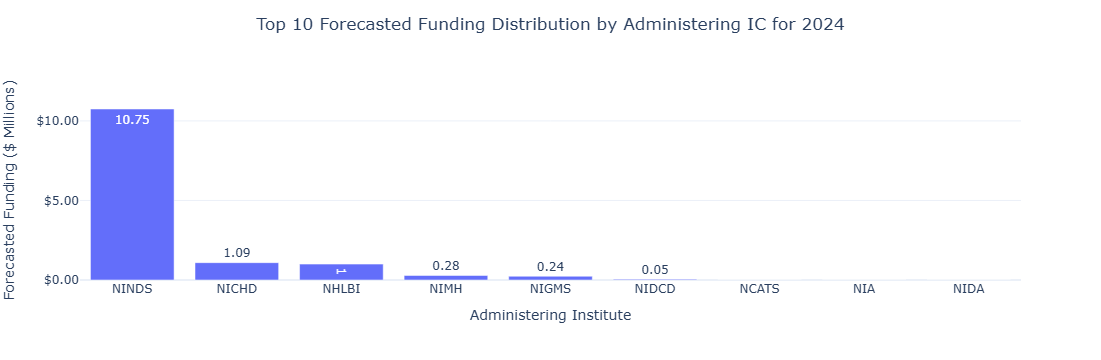

In [17]:
# Converting the Series to a DataFrame for easier plotting
forecasted_df = forecasted_distribution_2024.to_frame(name='Forecasted Funding')
forecasted_df['Administering IC'] = forecasted_df.index

# Sorting to get the top 10 and resetting index for better plotting
forecasted_df = forecasted_df.sort_values(by='Forecasted Funding', ascending=False).head(10).reset_index(drop=True)

# Converting Forecasted Funding to millions for easier reading
forecasted_df['Forecasted Funding'] = forecasted_df['Forecasted Funding'] / 1e6

# Using Plotly to create a bar chart
fig = px.bar(forecasted_df,
             x='Administering IC',
             y='Forecasted Funding',
             title='Top 10 Forecasted Funding Distribution by Administering IC for 2024',
             text=forecasted_df['Forecasted Funding'].round(2),
             labels={'Forecasted Funding': 'Forecasted Funding ($ Millions)', 'Administering IC': 'Administering Institute'},
             template='plotly_white')

# Adding dollar formatting to the y-axis
fig.update_layout(yaxis_tickprefix='$', 
                  yaxis_tickformat=',.2f',
                  height=600,  # Increase the height of the graph
                  template='plotly_white',
                 title={
        'text': 'Top 10 Forecasted Funding Distribution by Administering IC for 2024',
        'y': 0.95,  # Positioning the title closer to the top
        'x': 0.5,  # Centering the title
        'xanchor': 'center',
        'yanchor': 'top'
    })

# Show the plot
fig.show()

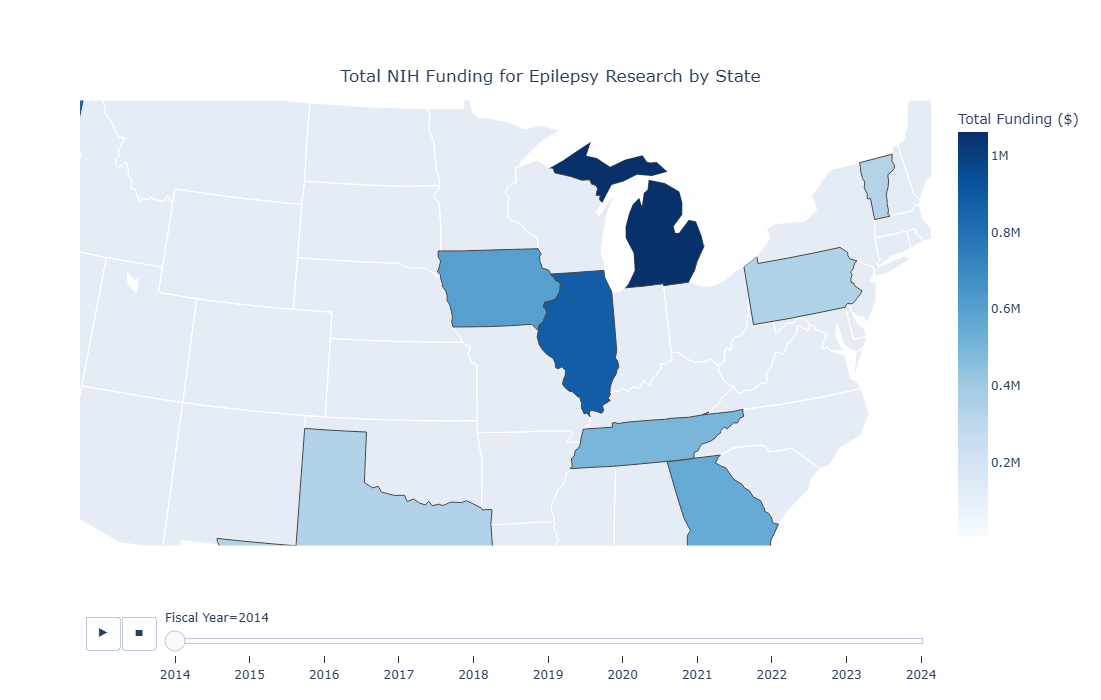

In [18]:
# Filtering out entries where Type is not 139104
filtered_data = nih_df[nih_df['Type'] != '139104']

# Grouping the data by Fiscal Year and Organization State and summing the Total Cost
funding_by_year_state = filtered_data.groupby(['Fiscal Year', 'Organization State'])['Total Cost'].sum().reset_index()

# Creating an animated choropleth map using Plotly
fig = px.choropleth(
    funding_by_year_state,
    locations='Organization State',
    locationmode='USA-states',
    color='Total Cost',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'Total Cost': 'Total Funding ($)', 'Organization State': 'State'},
    title='Total NIH Funding for Epilepsy Research by State',
    animation_frame='Fiscal Year'
)

# Formatting the hover data to display in millions
fig.update_traces(
    hovertemplate='State: %{location}<br>Total Funding: $%{z:,.2f}'
)

# Updating layout for better visualization, including increasing the size of the map
fig.update_layout(
    title={
        'text': 'Total NIH Funding for Epilepsy Research by State',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    ),
    width=1000,  # Increase the width of the map
    height=700   # Increase the height of the map
)

# Show the plot
fig.show()

# Model Prediction

In [17]:
# Step 1: Load the data
import pandas as pd

# Load the dataset
data_path = 'NIH_DravetSyndrome_2014_2024.csv'
dravet_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
dravet_data.head()

NIH Spending Categorization  \
0                          No NIH Category available   
1                          No NIH Category available   
2                          No NIH Category available   
3  Brain Disorders; Epilepsy; Neurodegenerative; ...   
4                          No NIH Category available   

                                       Project Terms  \
0  Acute;Administrative Supplement;Animal Model;A...   
1  Acute;Animal Model;Animals;Apnea;Arousal;Biolo...   
2  Action Potentials;Affect;Age;Age Months;Axon;C...   
3  Acute;Administrative Supplement;Animal Model;A...   
4  5&apos;-AMP-activated protein kinase;Age;Anima...   

                                       Project Title  \
0  Administrative Supplement to Investigate Subpo...   
1  Serotonergic circuit mechanisms in postictal r...   
2  Aberrant Parvalbumin-Positive Interneuron Acti...   
3  Administrative Supplement to Serotonergic circ...   
4  Pharmacological and Chemical Approaches to Rep...   

                             Public Health Relevance Administering IC  \
0  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
1  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
2  PROJECT NARRATIVESCN8A encephalopathy is a sev...            NINDS   
3  NARRATIVESudden unexpected death in epilepsy (...            NINDS   
4  RELEVANCE TO PUBLIC HEALTHAggressive and invas...            NIGMS   

   Application ID Award Notice Date Opportunity Number     Project Number  \
0        11035485    5/10/2024 0:00          PA-23-189  3R01NS129722-02S2   
1        10983056   11/22/2023 0:00          PA-20-185  3R01NS129722-02S1   
2        10901303    3/26/2024 0:00          PA-21-052  1F31NS134264-01A1   
3        10841319    8/22/2023 0:00          PA-21-071  3R01NS129722-01S1   
4        10837849     5/9/2024 0:00         PAR-21-169    5R16GM145557-03   

  Type  ...     Funding Mechanism Fiscal Year Total Cost  \
0    3  ...         Non-SBIR/STTR        2024      43783   
1    3  ...         Non-SBIR/STTR        2024      65564   
2    1  ...  Training, Individual        2024      38001   
3    3  ...         Non-SBIR/STTR        2023      27837   
4    5  ...         Non-SBIR/STTR        2024     164000   

  Total Cost (Sub Projects) Funding IC(s) Direct Cost IC InDirect Cost IC  \
0                                   NINDS          30591            13192   
1                                   NINDS          45241            20323   
2                                   NINDS          38001                0   
3                                   NINDS          19184             8653   
4                                   NIGMS         100000            64000   

  NIH COVID-19 Response                                   Project Abstract  \
0                        ABSTRACTSudden unexpected death in epilepsy (S...   
1                        ABSTRACTSudden unexpected death in epilepsy (S...   
2                        PROJECT SUMMARYSCN8A epileptic encephalopathy ...   
3                        ABSTRACTSudden unexpected death in epilepsy (S...   
4                        PROJECT SUMMARY / ABSTRACTGlioblastoma multifo...   

  Total Cost IC  
0         43783  
1         65564  
2         38001  
3         27837  
4        164000  

[5 rows x 53 columns]

In [34]:
!pip install transformers
!pip install torch

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 533.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.1 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.1 MB 16.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/9.1 MB 20.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.1 MB 24.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.6/9.1 MB 25.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.2/9.1 MB 23.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.1 MB 22.3 MB/s eta 0:00:01
   ------

   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/159.8 MB 1.7 MB/s eta 0:01:37
   ---------------------------------------- 0.6/159.8 MB 7.4 MB/s eta 0:00:22
    --------------------------------------- 2.1/159.8 MB 16.6 MB/s eta 0:00:10
    --------------------------------------- 3.5/159.8 MB 20.0 MB/s eta 0:00:08
    --------------------------------------- 3.8/159.8 MB 18.9 MB/s eta 0:00:09
   - -------------------------------------- 7.1/159.8 MB 26.5 MB/s eta 0:00:06
   -- ------------------------------------- 8.5/159.8 MB 27.1 MB/s eta 0:00:06
   -- ------------------------------------- 10.0/159.8 MB 27.7 MB/s eta 0:00:06
   -- ------------------------------------- 11.7/159.8 MB 34.6 MB/s eta 0:00:05
   --- ------------------------------------ 13.1/159.8 MB 34.4 MB/s eta 0:00:05
   --- ------------------------------------ 14.7/159.8 MB 38.6 MB/s eta 0:00:04
   ---- ----------------------------------- 16.2/159.8 MB 

In [43]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch

# Load the dataset
dravet_data = pd.read_csv('NIH_DravetSyndrome_2014_2024.csv')

# Convert date columns to datetime format
date_columns = ['Award Notice Date', 'Project Start Date', 'Project End Date', 'Budget Start Date', 'Budget End Date']
for col in date_columns:
    dravet_data[col] = pd.to_datetime(dravet_data[col], errors='coerce')

# Convert numerical columns to appropriate data types
numerical_columns = ['Application ID', 'Fiscal Year', 'Total Cost']
for col in numerical_columns:
    dravet_data[col] = pd.to_numeric(dravet_data[col], errors='coerce')

# Drop highly correlated features
dravet_data_filtered = dravet_data.drop(columns=['Total Cost IC', 'InDirect Cost IC', 'Direct Cost IC', 'Total Cost (Sub Projects)', 'Project Abstract',
                                                 'Project Title'])

# Handle missing values by filling with zeros (or other appropriate value/strategy)
dravet_data_filtered = dravet_data_filtered.fillna('')

# Define text features to be embedded
text_features = ['Project Terms', 'Public Health Relevance']

# Ensure all text data is converted to strings
for feature in text_features:
    dravet_data_filtered[feature] = dravet_data_filtered[feature].astype(str)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to convert text to BERT embeddings
def text_to_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    # Use the CLS token embedding as the representation
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Convert text features to embeddings and add them to the dataframe
for feature in text_features:
    embeddings = np.array([text_to_embedding(text)[0] for text in dravet_data_filtered[feature]])
    for i in range(embeddings.shape[1]):
        dravet_data_filtered[f'{feature}_embedding_{i}'] = embeddings[:, i]

# Drop the original text features
dravet_data_filtered = dravet_data_filtered.drop(columns=text_features)

# Convert all non-numeric columns to numeric where possible, filling the rest with zeros
dravet_data_filtered = dravet_data_filtered.apply(pd.to_numeric, errors='coerce').fillna(0)

# Define features and target variable
X = dravet_data_filtered.drop(['Total Cost'], axis=1)
y = dravet_data_filtered['Total Cost']


C:\Users\nihar\AppData\Local\Temp\ipykernel_12804\3080584016.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dravet_data_filtered[f'{feature}_embedding_{i}'] = embeddings[:, i]
C:\Users\nihar\AppData\Local\Temp\ipykernel_12804\3080584016.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dravet_data_filtered[f'{feature}_embedding_{i}'] = embeddings[:, i]
C:\Users\nihar\AppData\Local\Temp\ipykernel_12804\3080584016.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Mean Squared Error: 21293335024.519436
R^2 Score: 0.5314885528018098


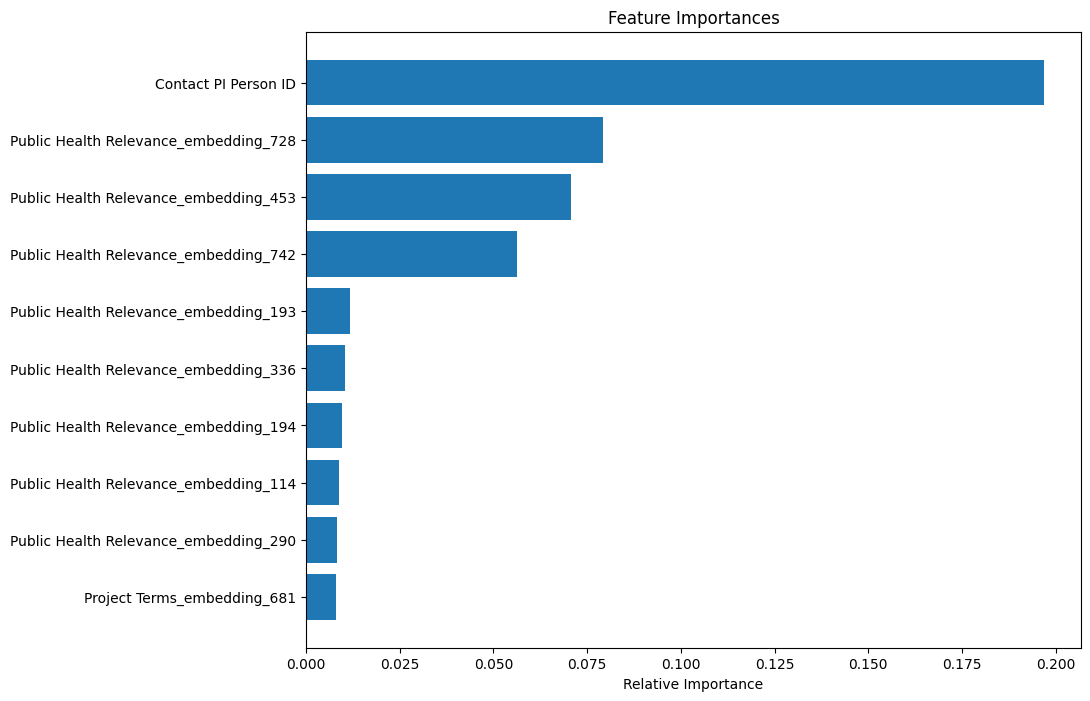

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot feature importances
indices = np.argsort(importances)[-10:]  # Top 10 features
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


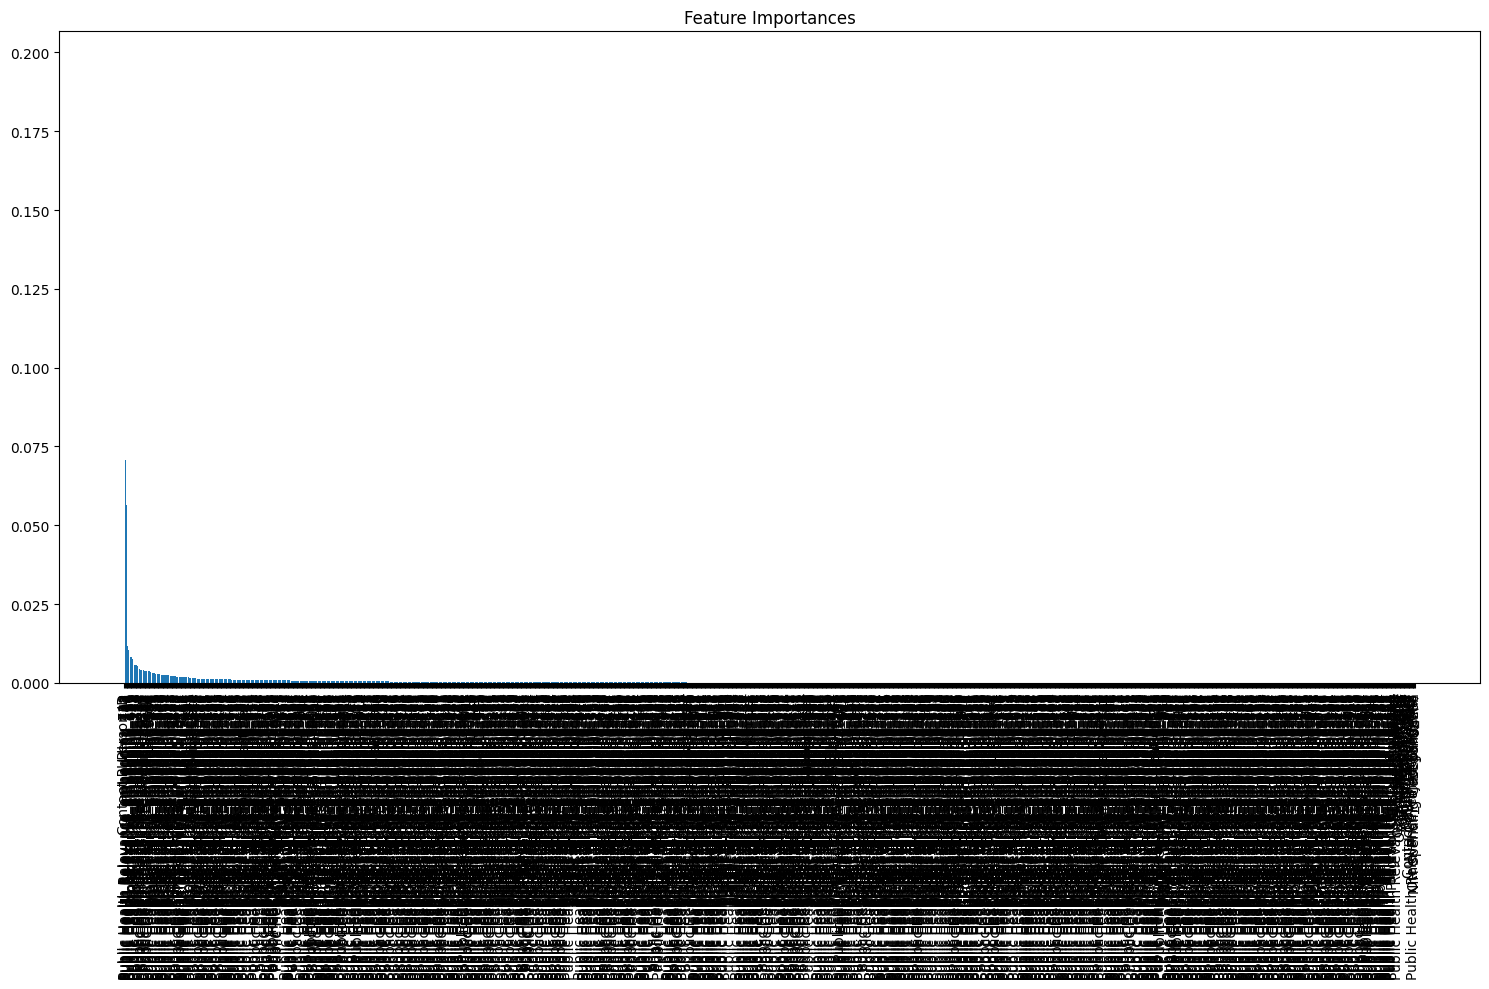

In [45]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


# New approach

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dravet_data = pd.read_csv('NIH_DravetSyndrome_2014_2024.csv')

# Convert date columns to datetime format
date_columns = ['Project Start Date', 'Project End Date']
for col in date_columns:
    dravet_data[col] = pd.to_datetime(dravet_data[col], errors='coerce')

# Extract useful information from date columns
dravet_data['Project Start Year'] = dravet_data['Project Start Date'].dt.year
dravet_data['Project End Year'] = dravet_data['Project End Date'].dt.year

# Select relevant features
features = [
    'NIH Spending Categorization', 'Administering IC', 'Type', 'Activity',
    'Study Section', 'Contact PI Person ID', 'Congressional District',
    'Department', 'Organization Name', 'Organization City', 'Organization State',
    'Organization Type', 'ARRA Indicator', 'CFDA Code', 'Funding Mechanism',
    'Fiscal Year', 'Project Start Year', 'Project End Year'
]

# Filter the data to keep only the relevant columns
dravet_data_filtered = dravet_data[features + ['Total Cost']].copy()

# Handle missing values
dravet_data_filtered.replace('Unknown', np.nan, inplace=True)

# One-hot encode categorical variables
categorical_features = [
    'NIH Spending Categorization', 'Administering IC', 'Type', 'Activity',
    'Study Section', 'Contact PI Person ID', 'Congressional District',
    'Department', 'Organization Name', 'Organization City', 'Organization State',
    'Organization Type', 'ARRA Indicator', 'CFDA Code', 'Funding Mechanism'
]
dravet_data_encoded = pd.get_dummies(dravet_data_filtered, columns=categorical_features)

# Fill NaN values with 0 for one-hot encoded features
dravet_data_encoded.fillna(0, inplace=True)

# Define features and target variable
X = dravet_data_encoded.drop(columns=['Total Cost'])
y = dravet_data_encoded['Total Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 12033490282.5975
R^2 Score: 0.7352303929537993


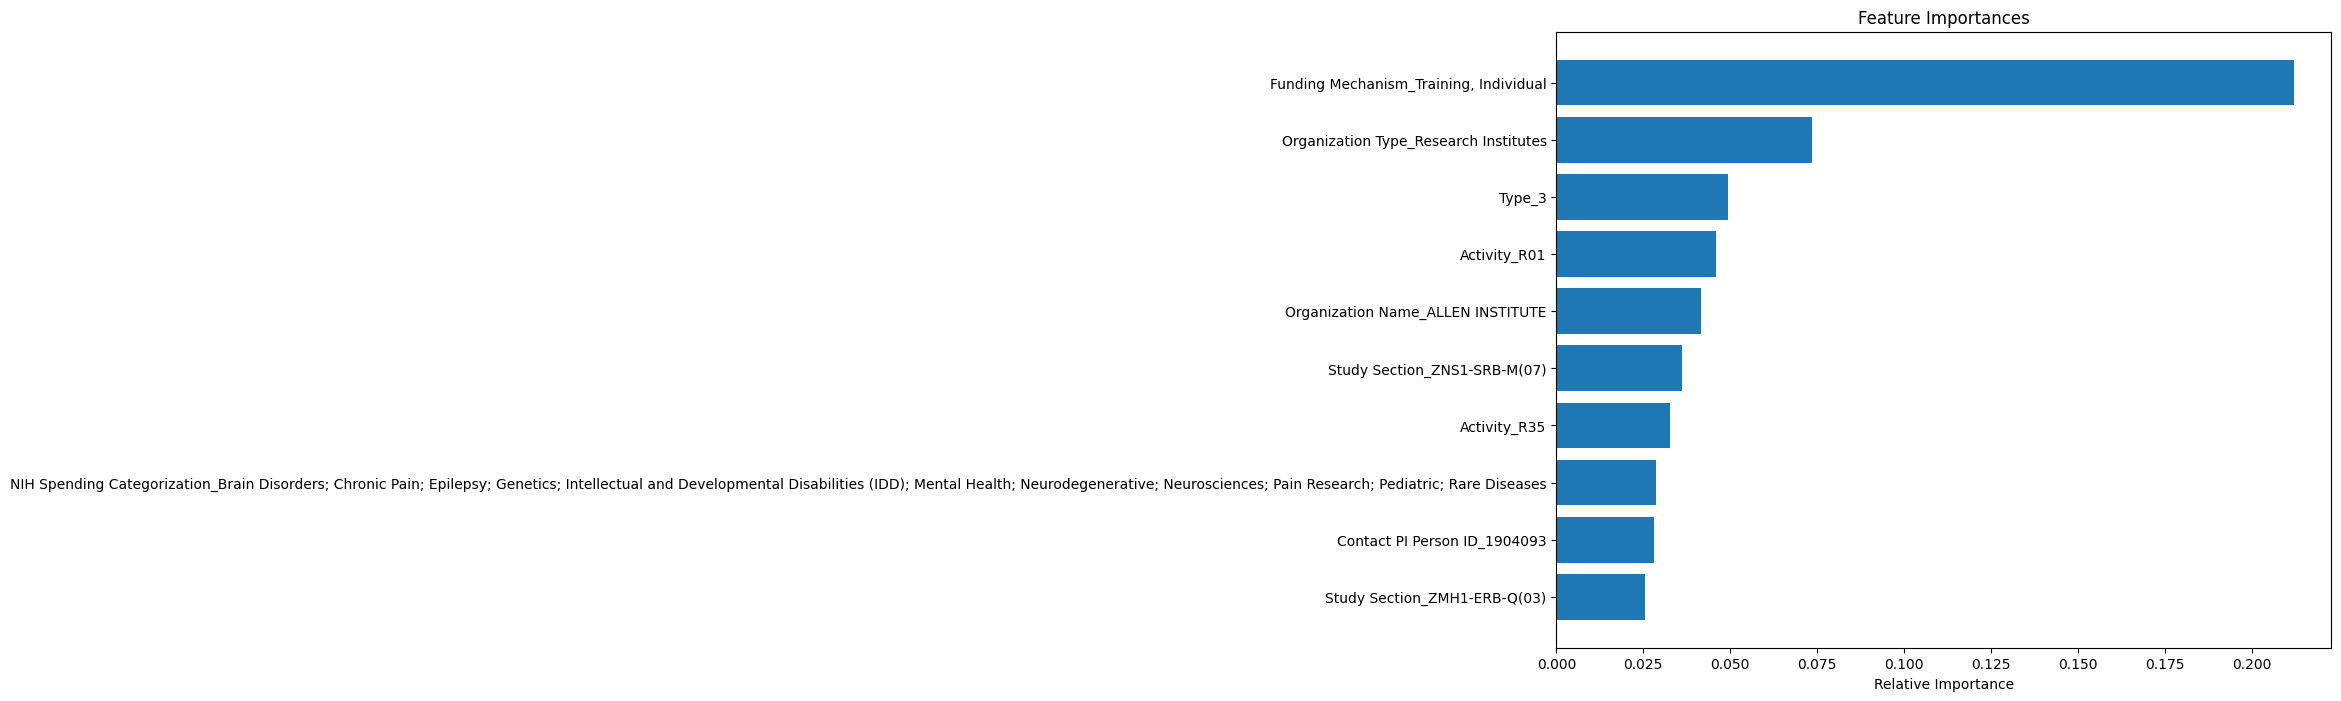

In [49]:
# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Get feature importances
importances = rf.feature_importances_

# Plot feature importances
indices = np.argsort(importances)[-10:]  # Top 10 features
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


XGBoost Mean Squared Error: 7251355149.492125
XGBoost R^2 Score: 0.8404504089507567


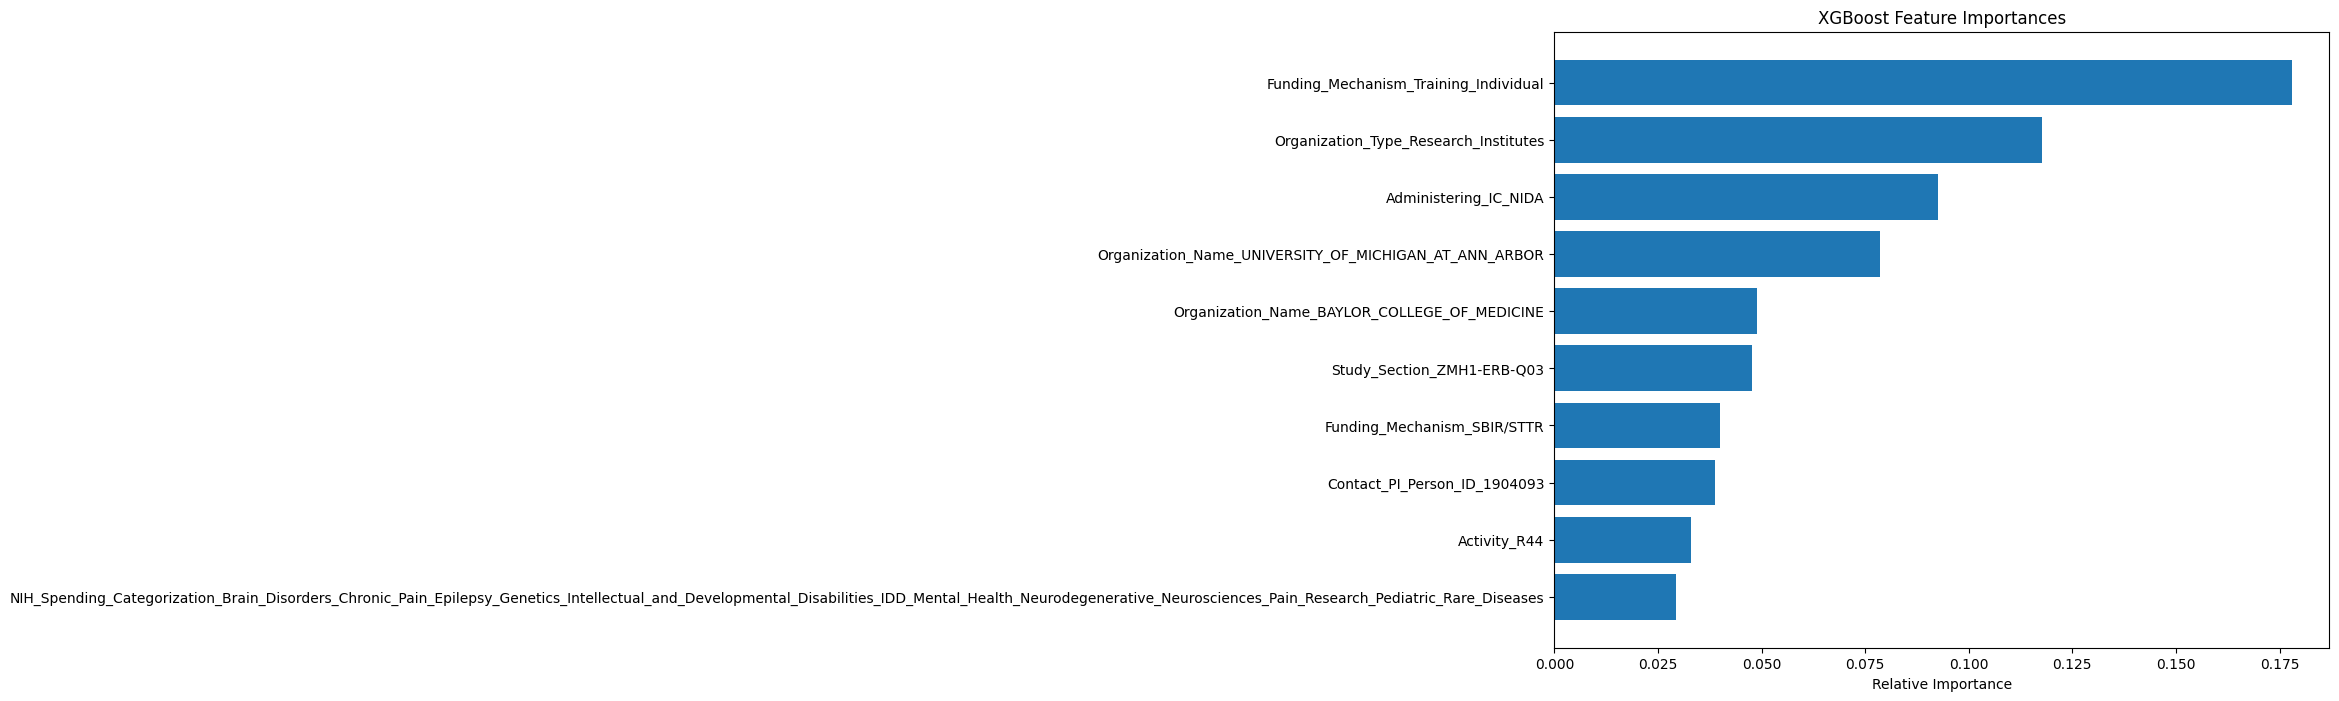

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dravet_data = pd.read_csv('NIH_DravetSyndrome_2014_2024.csv')

# Convert date columns to datetime format
date_columns = ['Project Start Date', 'Project End Date']
for col in date_columns:
    dravet_data[col] = pd.to_datetime(dravet_data[col], errors='coerce')

# Extract useful information from date columns
dravet_data['Project Start Year'] = dravet_data['Project Start Date'].dt.year
dravet_data['Project End Year'] = dravet_data['Project End Date'].dt.year


# Attributes to use in the model
selected_attributes = ['NIH Spending Categorization', 'Administering IC', 'Type', 'Activity',
                       'Project Start Date', 'Project End Date', 'Study Section', 'Contact PI Person ID',
                       'Congressional District', 'Department', 'Organization Name', 'Organization City',
                       'Organization State', 'Organization Type', 'ARRA Indicator', 'CFDA Code',
                       'Funding Mechanism', 'Fiscal Year']

# Filter the data to only include selected attributes
dravet_data_filtered = dravet_data[selected_attributes + ['Total Cost']].copy()

# Convert categorical data to numerical
dravet_data_filtered = pd.get_dummies(dravet_data_filtered, drop_first=True)

# Fill missing values with 0
dravet_data_filtered = dravet_data_filtered.fillna(0)

# Ensure all data types are numeric
dravet_data_filtered = dravet_data_filtered.apply(pd.to_numeric, errors='coerce')

# Define features and target variable
X = dravet_data_filtered.drop(['Total Cost'], axis=1)
y = dravet_data_filtered['Total Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names to ensure they are valid and unique
def clean_column_name(name):
    return str(name).replace("[", "").replace("]", "").replace("<", "").replace(">", "").replace(" ", "_").replace("(", "").replace(")", "").replace(",", "").replace(":", "").replace(";", "")

X_train.columns = [clean_column_name(col) for col in X_train.columns]
X_test.columns = [clean_column_name(col) for col in X_test.columns]

# Ensure feature names are unique
unique_columns = []
for i, col in enumerate(X_train.columns):
    if col in unique_columns:
        col = f"{col}_{i}"
    unique_columns.append(col)
X_train.columns = unique_columns
X_test.columns = unique_columns

# Train an XGBoost model
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgbr.predict(X_test)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print metrics
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')

# Get feature importances
importances_xgb = xgbr.feature_importances_

# Plot feature importances
indices_xgb = np.argsort(importances_xgb)[-10:]  # Top 10 features
plt.figure(figsize=(10, 8))
plt.title('XGBoost Feature Importances')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align='center')
plt.yticks(range(len(indices_xgb)), [X_train.columns[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best XGBoost Mean Squared Error: 4388919454.7719345
Best XGBoost R^2 Score: 0.9034318014052898


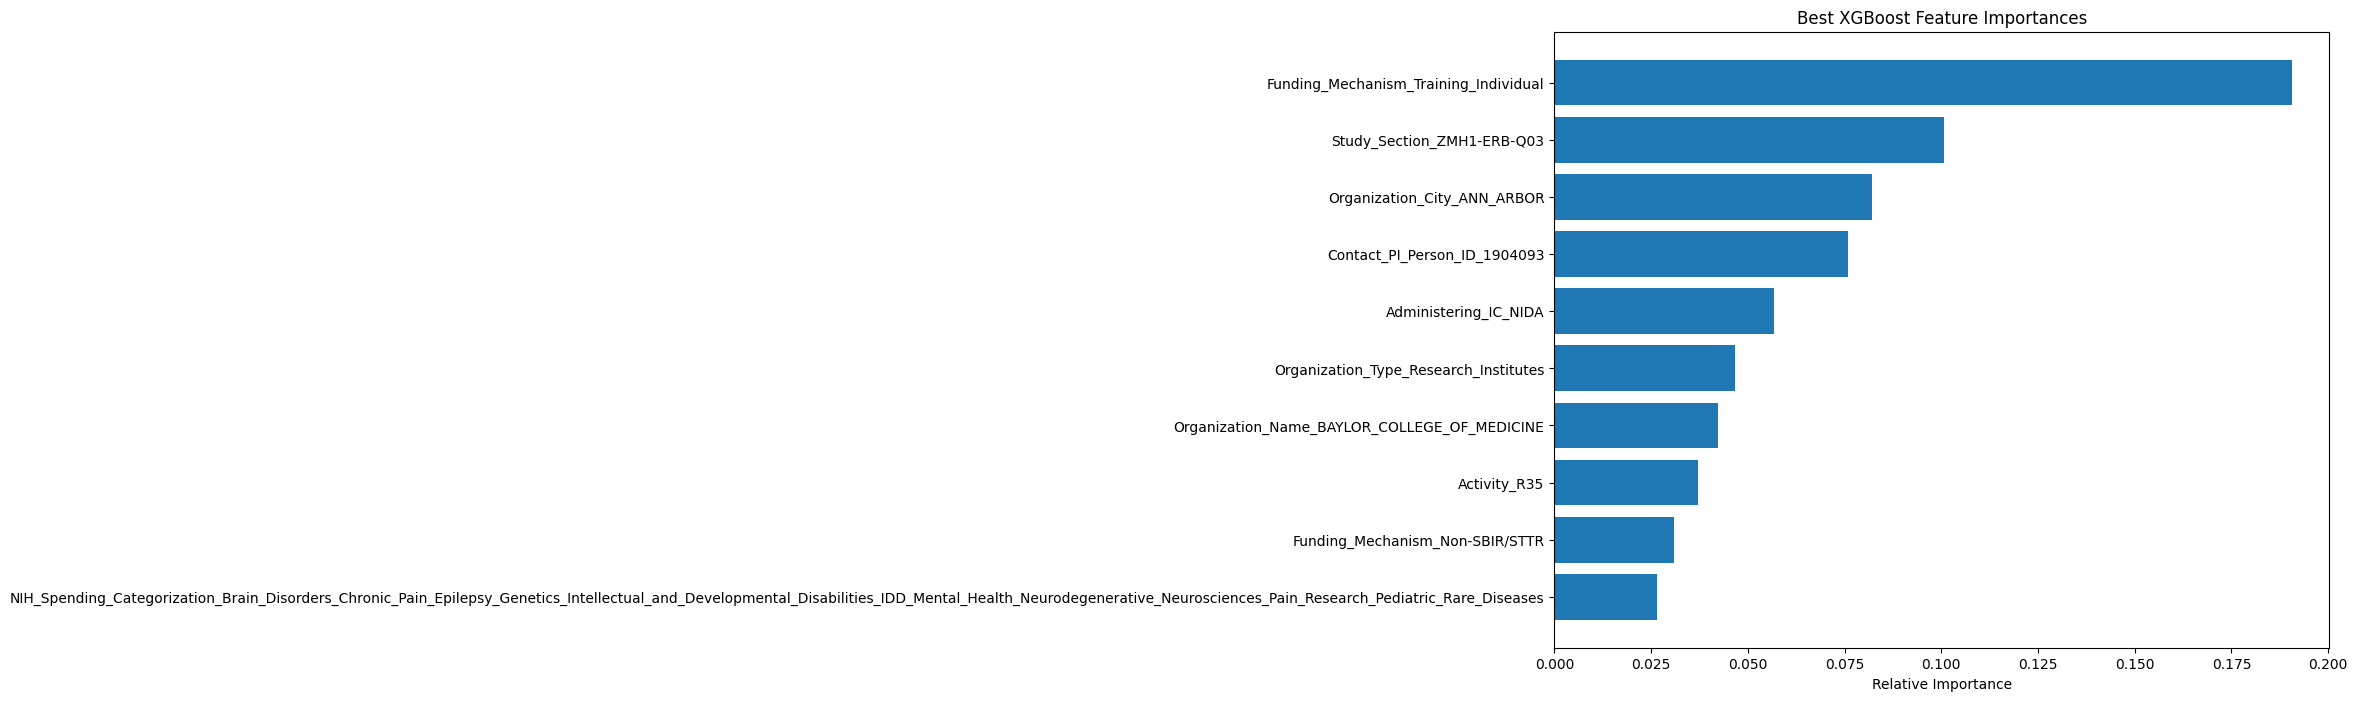

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the model
xgbr = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgbr = xgb.XGBRegressor(**best_params, random_state=42)
best_xgbr.fit(X_train, y_train)

# Predict on the test set
y_pred_best_xgb = best_xgbr.predict(X_test)

# Calculate metrics
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print metrics
print(f'Best XGBoost Mean Squared Error: {mse_best_xgb}')
print(f'Best XGBoost R^2 Score: {r2_best_xgb}')

# Get feature importances
importances_best_xgb = best_xgbr.feature_importances_

# Plot feature importances
indices_best_xgb = np.argsort(importances_best_xgb)[-10:]  # Top 10 features
plt.figure(figsize=(10, 8))
plt.title('Best XGBoost Feature Importances')
plt.barh(range(len(indices_best_xgb)), importances_best_xgb[indices_best_xgb], align='center')
plt.yticks(range(len(indices_best_xgb)), [X_train.columns[i] for i in indices_best_xgb])
plt.xlabel('Relative Importance')
plt.show()


In [66]:
# Extract year from Project Start Date and Project End Date
dravet_data['Project Start Year'] = dravet_data['Project Start Date'].dt.year
dravet_data['Project End Year'] = dravet_data['Project End Date'].dt.year

# Attributes to use in the model
selected_attributes = ['NIH Spending Categorization', 'Administering IC', 'Type', 'Activity',
                       'Project Start Date', 'Project End Date', 'Study Section', 'Contact PI Person ID',
                       'Congressional District', 'Department', 'Organization Name', 'Organization City',
                       'Organization State', 'Organization Type', 'ARRA Indicator', 'CFDA Code',
                       'Funding Mechanism', 'Fiscal Year']

# Filter the data to only include selected attributes
dravet_data_filtered = dravet_data[selected_attributes + ['Total Cost']].copy()

# Convert categorical data to numerical
dravet_data_filtered = pd.get_dummies(dravet_data_filtered, drop_first=True)

# Fill missing values with 0
dravet_data_filtered = dravet_data_filtered.fillna(0)

# Ensure all data types are numeric
dravet_data_filtered = dravet_data_filtered.apply(pd.to_numeric, errors='coerce')

# Define features and target variable
X = dravet_data_filtered.drop(['Total Cost'], axis=1)
y = dravet_data_filtered['Total Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names to ensure they are valid and unique
def clean_column_name(name):
    return str(name).replace("[", "").replace("]", "").replace("<", "").replace(">", "").replace(" ", "_").replace("(", "").replace(")", "").replace(",", "").replace(":", "").replace(";", "")

X_train.columns = [clean_column_name(col) for col in X_train.columns]
X_test.columns = [clean_column_name(col) for col in X_test.columns]

# Ensure feature names are unique
unique_columns = []
for i, col in enumerate(X_train.columns):
    if col in unique_columns:
        col = f"{col}_{i}"
    unique_columns.append(col)
X_train.columns = unique_columns
X_test.columns = unique_columns

# Train the model with the best parameters
best_xgbr.fit(X_train, y_train)

# Predict on the test set
y_pred_best_xgb = best_xgbr.predict(X_test)

# Calculate metrics
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print metrics
print(f'Best XGBoost Mean Squared Error with Feature Engineering: {mse_best_xgb}')
print(f'Best XGBoost R^2 Score with Feature Engineering: {r2_best_xgb}')


Best XGBoost Mean Squared Error with Feature Engineering: 4388919454.7719345
Best XGBoost R^2 Score with Feature Engineering: 0.9034318014052898


In [63]:
import joblib

# Save the model
joblib.dump(best_xgbr, 'best_xgboost_model.pkl')

['best_xgboost_model.pkl']

# Robust Preprocessing Pipeline

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dravet_data = pd.read_csv('NIH_DravetSyndrome_2014_2024.csv')

# Correct the datatypes
# Convert dates
date_columns = ['Award Notice Date', 'Project Start Date', 'Project End Date', 'Budget Start Date', 'Budget End Date']
for col in date_columns:
    dravet_data[col] = pd.to_datetime(dravet_data[col], errors='coerce')

# Convert numerical columns to float
numerical_columns = ['Application ID', 'Fiscal Year', 'Total Cost', 'Direct Cost IC', 'InDirect Cost IC', 'Total Cost IC']
for col in numerical_columns:
    dravet_data[col] = pd.to_numeric(dravet_data[col], errors='coerce')

# Convert categorical data
category_columns = ['Administering IC', 'Type', 'Activity', 'Study Section', 'Contact PI Person ID', 'Congressional District', 'Department',
                    'Organization Name', 'Organization City', 'Organization State', 'Organization Type', 'ARRA Indicator', 'CFDA Code',
                    'Funding Mechanism']
for col in category_columns:
    dravet_data[col] = dravet_data[col].astype('category')


In [ ]:
# Label encoding for categorical variables
label_encoders = {}
for col in category_columns:
    le = LabelEncoder()
    dravet_data[col] = le.fit_transform(dravet_data[col].astype(str))
    label_encoders[col] = le

# Extract year from Project Start Date and Project End Date
dravet_data['Project Start Year'] = dravet_data['Project Start Date'].dt.year
dravet_data['Project End Year'] = dravet_data['Project End Date'].dt.year

# Attributes to use in the model
selected_attributes = ['NIH Spending Categorization', 'Administering IC', 'Type', 'Activity',
                       'Project Start Year', 'Project End Year', 'Study Section', 'Contact PI Person ID',
                       'Congressional District', 'Department', 'Organization Name', 'Organization City',
                       'Organization State', 'Organization Type', 'ARRA Indicator', 'CFDA Code',
                       'Funding Mechanism', 'Fiscal Year']


In [74]:
from sklearn.model_selection import train_test_split
import joblib

# Filter the data to only include selected attributes
dravet_data_filtered = dravet_data[selected_attributes + ['Total Cost']].copy()

# Fill missing values with 0
#dravet_data_filtered = dravet_data_filtered.fillna(0)

# Ensure all data types are numeric
dravet_data_filtered = dravet_data_filtered.apply(pd.to_numeric, errors='coerce')

# Define features and target variable
X = dravet_data_filtered.drop(['Total Cost'], axis=1)
y = dravet_data_filtered['Total Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the best parameters
from xgboost import XGBRegressor

best_xgbr = XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9, random_state=42)
best_xgbr.fit(X_train, y_train)

# Predict on the test set
y_pred_best_xgb = best_xgbr.predict(X_test)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print metrics
print(f'Best XGBoost Mean Squared Error with Feature Engineering: {mse_best_xgb}')
print(f'Best XGBoost R^2 Score with Feature Engineering: {r2_best_xgb}')

# Save the model and label encoders
joblib.dump(best_xgbr, 'best_xgboost_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


Best XGBoost Mean Squared Error with Feature Engineering: 17704857945.44724
Best XGBoost R^2 Score with Feature Engineering: 0.6104448359588487


['label_encoders.pkl']

In [96]:
list(dravet_data['Study Section'].unique())[11]

'Acute Neural Injury and Epilepsy Study Section[ANIE]'

# Clinical Trial dataset

In [20]:
clinical_trials_data  = pd.read_csv('Clinical_Trials_for_Epilepsy.csv')

In [21]:
clinical_trials_data .head()

NCT Number                                        Study Title  \
0  NCT00029536  Progesterone vs Placebo Therapy for Women With...   
1  NCT03467113  A Study to Assess the Safety and Tolerability ...   
2  NCT04595513  Stopping TSC Onset and Progression 2: Epilepsy...   
3  NCT03371836           Use of Clobazam for Epilepsy and Anxiety   
4  NCT04289467  Treatment of Refractory Infantile Spasms With ...   

                                      Study URL Study Status  \
0  https://clinicaltrials.gov/study/NCT00029536    COMPLETED   
1  https://clinicaltrials.gov/study/NCT03467113    COMPLETED   
2  https://clinicaltrials.gov/study/NCT04595513    COMPLETED   
3  https://clinicaltrials.gov/study/NCT03371836    COMPLETED   
4  https://clinicaltrials.gov/study/NCT04289467   RECRUITING   

                                       Brief Summary  \
0  The purpose of this investigation was to deter...   
1  This is an open label study to evaluate the sa...   
2  This phase I/II clinical trial is an open-labe...   
3  This study is an open label, adjunctive, proof...   
4  This is a phase II clinical trial in which chi...   

                                Conditions  \
0                                 Epilepsy   
1  Dravet Syndrome|Lennox Gastaut Syndrome   
2      Tuberous Sclerosis Complex|Epilepsy   
3                         Epilepsy|Anxiety   
4                          Infantile Spasm   

                                       Interventions  \
0  BIOLOGICAL: Progesterone Lozenges|OTHER: Match...   
1  DRUG: ZX008 0.2 to 0.8 mg/kg/day|DRUG: Cannabi...   
2                          DRUG: TAVT-18 (sirolimus)   
3                                     DRUG: Clobazam   
4                                 DRUG: Fenfluramine   

                            Primary Outcome Measures  \
0  Percent of Women Who Show a Greater Than 50% D...   
1  Adverse Events, Number of adverse events inclu...   
2  Safety - adverse events, Percentage of subject...   
3  CGI-I, Mean of Clinical Global Impression-Impr...   
4  Electroclinical response (Efficacy), Number of...   

                                             Sponsor  \
0               Beth Israel Deaconess Medical Center   
1  Zogenix International Limited, Inc., a subsidi...   
2     Children's Hospital Medical Center, Cincinnati   
3  Hugo W. Moser Research Institute at Kennedy Kr...   
4               Children's Hospital of Orange County   

                                       Collaborators     Sex           Age  \
0  Brigham and Women's Hospital|Columbia Universi...  FEMALE  CHILD, ADULT   
1                                                NaN     ALL  CHILD, ADULT   
2                                                NaN     ALL         CHILD   
3                                                NaN     ALL         CHILD   
4                                                NaN     ALL         CHILD   

          Phases  Enrollment Funder Type      Study Type  \
0         PHASE3      294.00       OTHER  INTERVENTIONAL   
1         PHASE1        9.00    INDUSTRY  INTERVENTIONAL   
2  PHASE1|PHASE2        5.00       OTHER  INTERVENTIONAL   
3         PHASE4       20.00       OTHER  INTERVENTIONAL   
4         PHASE2       10.00       OTHER  INTERVENTIONAL   

                                        Study Design Start Date  \
0  Allocation: RANDOMIZED|Intervention Model: PAR...  10/1/2000   
1  Allocation: NA|Intervention Model: SINGLE_GROU...  1/19/2018   
2  Allocation: NA|Intervention Model: SINGLE_GROU...   9/8/2020   
3  Allocation: NA|Intervention Model: SINGLE_GROU...  10/1/2017   
4  Allocation: NA|Intervention Model: SINGLE_GROU...  6/16/2023   

  Primary Completion Date                                          Locations  
0                 2010-06  University of Southern California, Keck School...  
1               6/24/2020  PANDA Neurology/CIRCA, Atlanta, Georgia, 30328...  
2              12/15/2022  Cincinnati Children's Hospital, Cincinnati, Oh...  
3              12/31/2019  Ken

In [22]:
# Define a function to correct the 'Start Date' format
def correct_start_date(date_str):
    if '/' in date_str:
        return date_str  # If the date already has '/', assume it's correct
    else:
        # Split the string on '-' and reformat it
        parts = date_str.split('-')
        if len(parts) == 2:  # Make sure the split parts list is correct
            new_date_str = f"{parts[1]}/1/{parts[0]}"  # Assuming the format should be MM/1/YYYY
            return new_date_str
        else:
            return date_str  # Return the original if the format is unexpected

# Drop rows with null values in 'Start Date'
clinical_trials_data.dropna(subset=['Start Date'], inplace=True)

# Apply the function to the 'Start Date' column
clinical_trials_data['Start Date'] = clinical_trials_data['Start Date'].apply(correct_start_date)

In [23]:
clinical_trials_data['Year'] = pd.to_datetime(clinical_trials_data['Start Date']).dt.year

In [24]:
# Pivot table to count studies by Sex, Age, and Phase over the years
summary_table_Sex = clinical_trials_data.pivot_table(index='Year', columns=['Sex'], aggfunc='size', fill_value=0)

In [25]:
summary_table_Sex

Sex   ALL  FEMALE  MALE
Year                   
1975    1       0     0
1991    1       0     0
1992    1       0     0
1993    1       0     0
1994    1       0     0
1996    2       0     0
1997    5       0     0
1998    3       0     0
1999    2       0     1
2000    9       2     0
2001    8       0     1
2002   13       1     0
2003   16       1     0
2004   16       1     0
2005   31       0     0
2006   35       1     2
2007   30       1     0
2008   29       1     0
2009   24       0     0
2010   35       3     0
2011   43       2     0
2012   32       1     0
2013   34       2     0
2014   31       1     0
2015   46       1     0
2016   35       1     0
2017   42       0     0
2018   56       0     0
2019   42       1     0
2020   39       0     0
2021   59       0     0
2022   58       2     0
2023   44       1     0
2024   27       0     0

In [26]:
# Pivot table to count studies by  Age, and Phase over the years
summary_table_Age = clinical_trials_data.pivot_table(index='Year', columns=['Age'], aggfunc='size', fill_value=0)

In [27]:
summary_table_Age

Age   ADULT  ADULT, OLDER_ADULT  CHILD  CHILD, ADULT  \
Year                                                   
1975      0                   0      0             0   
1991      0                   0      0             0   
1992      0                   0      0             0   
1993      0                   0      0             0   
1994      0                   0      0             0   
1996      0                   0      0             0   
1997      0                   1      1             0   
1998      0                   1      0             0   
1999      2                   0      0             0   
2000      0                   1      2             1   
2001      1                   3      0             0   
2002      1                   2      4             1   
2003      1                   7      2             1   
2004      1                   3      6             1   
2005      1                  12      2             5   
2006      2                  20      3             5   
2007      4                  11      5             3   
2008      5                  10      3             3   
2009      4                  10      4             2   
2010      5                  14      2             4   
2011      6                  16      7             2   
2012      3                  13      4             3   
2013      2                  15      5             4   
2014      3                   9      7             8   
2015      6                  17      6            10   
2016      3                  14      5             8   
2017      6                  14     10             9   
2018      2                  16      8            13   
2019      5                  20      4             4   
2020      5                  11      4             8   
2021      4                  19     13            13   
2022      4                  25      3            14   
2023      3                  31      4             2   
2024      2                  11      5             3   

Age   CHILD, ADULT, OLDER_ADULT  OLDER_ADULT  
Year                                          
1975                          1            0  
1991                          1            0  
1992                          1            0  
1993                          1            0  
1994                          1            0  
1996                          2            0  
1997                          3            0  
1998                          2            0  
1999                          1            0  
2000                          6            1  
2001                          5            0  
2002                          6            0  
2003                          6            0  
2004                          5            1  
2005                         11            0  
2006                          8            0  
2007                          7            1  
2008                          8            1  
2009                          4            0  
2010                         13            0  
2011                         13            1  
2012                         10            0  
2013                         10            0  
2014                          5            0  
2015                          8            0  
2016                          6            0  
2017                          3            0  
2018                         17            0  
2019                         10            0  
2020                         11            0  
2021                         10            0  
2022                         14            0  
2023                          5            0  
2024                          6            0

In [28]:
summary_table_Age1 = summary_table_Age.reset_index()
# Calculate descriptive statistics
descriptive_stats_Age = summary_table_Age1.describe()

# Adding median, which is not included by default in describe()
descriptive_stats_Age.loc['50%'] = summary_table_Age1.median()

descriptive_stats_Age

Age      Year  ADULT  ADULT, OLDER_ADULT  CHILD  CHILD, ADULT  \
count   34.00  34.00               34.00  34.00         34.00   
mean  2006.91   2.38                9.59   3.50          3.74   
std     11.23   2.06                8.29   3.15          4.20   
min   1975.00   0.00                0.00   0.00          0.00   
25%   1999.25   0.25                1.00   0.25          0.00   
50%   2007.50   2.00               10.50   3.50          2.50   
75%   2015.75   4.00               14.75   5.00          5.00   
max   2024.00   6.00               31.00  13.00         14.00   

Age    CHILD, ADULT, OLDER_ADULT  OLDER_ADULT  
count                      34.00        34.00  
mean                        6.47         0.15  
std                         4.30         0.36  
min                         1.00         0.00  
25%                         3.00         0.00  
50%                         6.00         0.00  
75%                        10.00         0.00  
max                        17.00         1.00